In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('preprocessed_df.csv', index_col=0)
df.head(2)

,lat,long,BIRD,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,REPTILE,...,POOR,SUMMER,SPRING,FALL,WINTER,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
0,30.494640,-91.15616,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
1,30.431417,-91.14107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0


/home/asureshkumar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/asureshkumar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

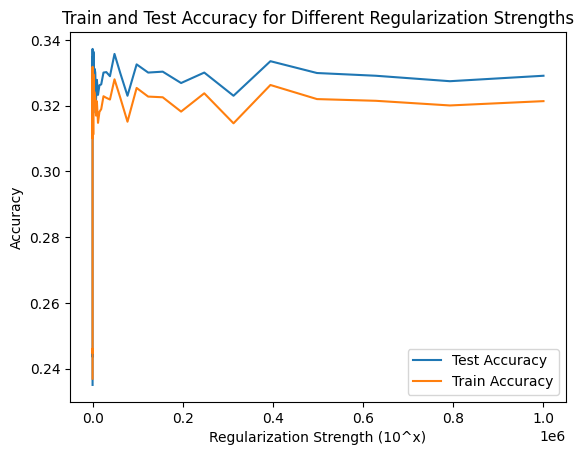

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df[['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED']]
X = df.drop(['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regs = []
tr_accs = []
te_accs = []

for c in np.logspace(-4, 6, 100):
    logistic_model = MultiOutputClassifier(LogisticRegression(C=c))
    logistic_model.fit(X_train, y_train)
    tr_logistic_predictions = logistic_model.predict(X_train)
    te_logistic_predictions = logistic_model.predict(X_test)
    
    regs.append(c)
    tr_accs.append(accuracy_score(y_train, tr_logistic_predictions))
    te_accs.append(accuracy_score(y_test, te_logistic_predictions))
    matrix = confusion_matrix(y_test.values.flatten(), logistic_predictions.flatten())
    report = classification_report(y_test.values.flatten(), logistic_predictions.flatten())

plt.plot(regs, te_accs, label='Test Accuracy')
plt.plot(regs, tr_accs, label='Train Accuracy')
plt.xlabel('Regularization Strength (10^x)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy for Different Regularization Strengths')
plt.show()